In [ ]:
from acne_detection import AcneDetector
from age_gender_estimation import AgeGenderEstimator
from dark_eye_detection import DarkEyeDetector
from facial_landmark import FacialLandmark
from wrinkles_detection import WrinklesDetector
import cv2
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'cntk'

In [2]:
def showImage(title, image):
#     pass
    cv2.imshow(title, image)
    cv2.moveWindow(title,0,0)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def printImage(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()

def plot_color(r, g, b):
    plt.imshow([[(r/255, g/255, b/255)]])
    plt.show()

In [3]:
file_path = "./test_images/image2.jpg"
ori_img = cv2.imread(file_path)

# Facial Landmark

In [4]:
fl = FacialLandmark(ori_img)

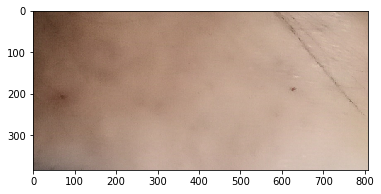

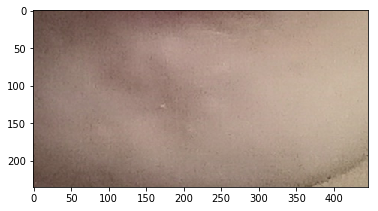

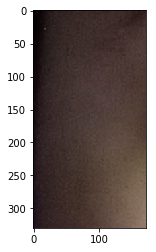

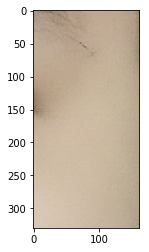

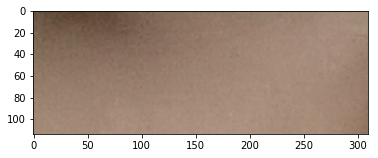

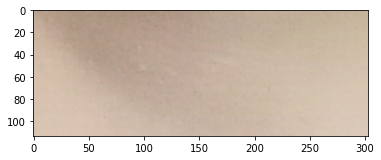

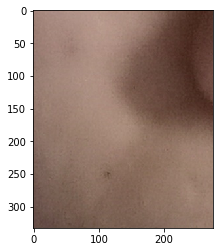

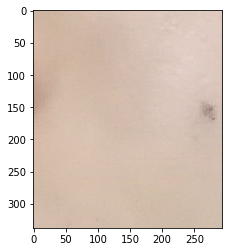

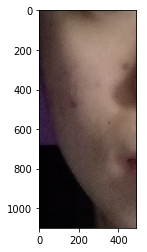

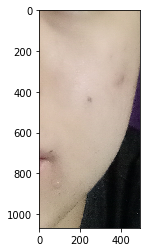

In [14]:
printImage(fl.get_forehead_region())
printImage(fl.get_chin_region())
r_cr, l_cr = fl.get_crows_feet_region()
printImage(r_cr)
printImage(l_cr)
r_cr, l_cr = fl.get_below_eyes_region()
printImage(r_cr)
printImage(l_cr)
r_cr, l_cr = fl.get_nasal_junction_region()
printImage(r_cr)
printImage(l_cr)
r_cr, l_cr = fl.get_cheeks_region()
printImage(r_cr)
printImage(l_cr)

# Age Gender

In [16]:
ag = AgeGenderEstimator(fl)
ag.predict_age_gender()

(25, 'M')

# Dark Eye

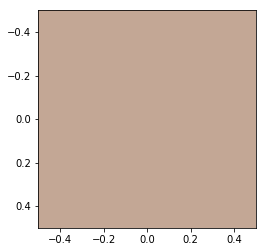

skin tone


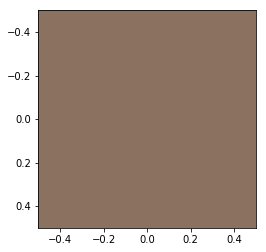

right dark eye


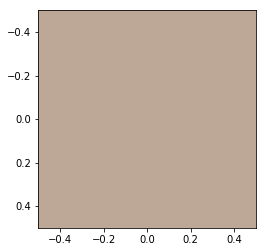

left dark eye
0.9566440633325992


In [21]:
de = DarkEyeDetector(fl)
plot_color(*de.get_skin_tone())
print("skin tone")
r, l = de.get_dark_eyes()
plot_color(*r)
print("right dark eye")
plot_color(*l)
print("left dark eye")
print("Score", de.get_score())

# Acne

In [5]:
ad = AcneDetector(fl)
ad.get_overall_score()

0.986

# Wrinkles

In [6]:
wd = WrinklesDetector(fl)
wd.get_overall_score()

0.0